In [63]:
import pandas as pd

df_model = pd.read_csv('../data/data_to_cluster06.csv')

In [64]:
df_model

,ability,able,absolutely,access,according,account,action,active,actually,ada,...,yok,youtube,yu,yuan,zhao,zhi,zhu,zi,zil,zuo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.decomposition import PCA
import seaborn as sns

def show_clusters_size(clusters):
    unique, counts = np.unique(clusters, return_counts=True)
    print(dict(zip(unique, counts)))

# DBSCAN

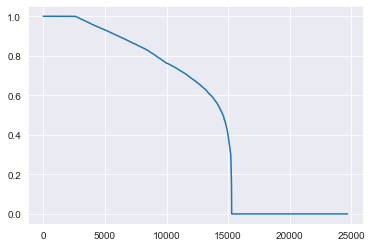

In [26]:
# k-dist function with MinPts = 2 * dimensions
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2000)
neighbors_fit = neighbors.fit(df_model)
distances, indices = neighbors_fit.kneighbors(df_model)
distances = np.sort(distances, axis=0)[::-1]
distances = distances[:,1]
plt.plot(distances)

In [65]:
# Parameters chosen using k-dist heuristic
eps = 0.6
minPts = 200

In [66]:
import time
from sklearn.cluster import DBSCAN

t0 = time.time()
dbscan = DBSCAN(eps=eps, min_samples=minPts).fit(df_model)
t_dbscan = time.time() - t0
print("DBSCAN required", t_dbscan, "seconds")
predictions = dbscan.fit_predict(df_model)
Clusters = predictions

DBSCAN required 10.402570962905884 seconds


In [67]:
show_clusters_size(Clusters)

{-1: 13533, 0: 327, 1: 1230, 2: 212}


In [40]:
# Testing different parameters
# Test 1
eps = 0.8
minPts = 120
dbscan = DBSCAN(eps=eps, min_samples=minPts).fit(df_model)
predictions = dbscan.fit_predict(df_model)
Clusters = predictions
show_clusters_size(Clusters)

KeyboardInterrupt: 

In [10]:
predictions

array([-1, -1, -1, ..., -1, -1, -1])

In [68]:
df_model_original = pd.read_csv('../data/data_original_06.csv')

In [69]:
df_model_original['Class'] = predictions

In [70]:
df_model_original.to_csv("DBSCAN062022_0.6200.csv",index=False)

# OPTICS

In [18]:
# OPTICS reachability distance plot
from sklearn.cluster import OPTICS

num_samples_total = 1000
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'
t0 = time.time()
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(df_model)
t_optics = time.time() - t0
print("OPTICS required", t_optics, "seconds")
labels = db.labels_
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_28538/977228184.py", line 10, in <module>
    db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(df_model)
  File "/usr/local/lib/python3.9/site-packages/sklearn/cluster/_optics.py", line 254, in fit
    self.predecessor_) = compute_optics_graph(
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/sklearn/cluster/_optics.py", line 495, in compute_optics_graph
    _set_reach_dist(core_distances_=core_distances_,
  File "/usr/local/lib/python3.9/site-packages/sklearn/cluster/_optics.py", line 534, in _set_reach_dist
    dists = pairwise_distances(P, np.take(X,

TypeError: object of type 'NoneType' has no len()